# Lab 3

This lab uses a dataset of faces, containing grayscale images of:

* $38$ individuals, $64$ images per person $\implies 38 \cdot 64=2432$ observations
* $32 \cdot 32$ pixels per person $\implies 1024$ dimensions per observation

In terms of representation, the we have 1024 columns (dimensions) representing the pixels and 2432 rows representing the observations.

In [2]:
#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [3]:
fea = pd.read_csv('faces_fea.csv',header=None)
fea.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,82,81,72,72,40,93,119,129,135,121,...,91,89,92,75,80,67,57,35,33,22
1,86,86,74,67,47,66,87,101,118,132,...,89,82,87,69,60,57,41,20,14,9
2,76,88,80,62,60,20,22,40,75,137,...,80,73,70,52,37,37,16,9,6,6
3,15,16,22,11,23,8,7,7,6,4,...,14,12,9,11,9,10,7,7,5,5
4,70,69,48,64,46,109,138,147,136,102,...,94,88,83,65,74,78,66,45,39,34


In [5]:
fea /= fea.max().max() # normalize data to range from 0 to 1
fea.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.321569,0.317647,0.282353,0.282353,0.156863,0.364706,0.466667,0.505882,0.529412,0.474510,...,0.356863,0.349020,0.360784,0.294118,0.313725,0.262745,0.223529,0.137255,0.129412,0.086275
1,0.337255,0.337255,0.290196,0.262745,0.184314,0.258824,0.341176,0.396078,0.462745,0.517647,...,0.349020,0.321569,0.341176,0.270588,0.235294,0.223529,0.160784,0.078431,0.054902,0.035294
2,0.298039,0.345098,0.313725,0.243137,0.235294,0.078431,0.086275,0.156863,0.294118,0.537255,...,0.313725,0.286275,0.274510,0.203922,0.145098,0.145098,0.062745,0.035294,0.023529,0.023529
3,0.058824,0.062745,0.086275,0.043137,0.090196,0.031373,0.027451,0.027451,0.023529,0.015686,...,0.054902,0.047059,0.035294,0.043137,0.035294,0.039216,0.027451,0.027451,0.019608,0.019608
4,0.274510,0.270588,0.188235,0.250980,0.180392,0.427451,0.541176,0.576471,0.533333,0.400000,...,0.368627,0.345098,0.325490,0.254902,0.290196,0.305882,0.258824,0.176471,0.152941,0.133333


Note that each element is a pixel value ranging from 0 (black) to 255 (white) - to plot this, we'll first need to reshape each column into a 2-dimensional matrix.

Raw pixel data:
 [0.32156863 0.31764706 0.28235294 ... 0.1372549  0.12941176 0.08627451]
Reshaped pixel data:
 [[0.32156863 0.31764706 0.28235294 ... 0.14117647 0.08235294 0.04705882]
 [0.36470588 0.37647059 0.35294118 ... 0.16862745 0.09019608 0.06666667]
 [0.42352941 0.41568627 0.44313725 ... 0.18823529 0.1254902  0.10196078]
 ...
 [0.38039216 0.43137255 0.2627451  ... 0.23529412 0.2        0.14509804]
 [0.36078431 0.36862745 0.36470588 ... 0.21568627 0.21568627 0.13333333]
 [0.27843137 0.2745098  0.31764706 ... 0.1372549  0.12941176 0.08627451]]
Translated, reshaped pixel data:
 [[0.32156863 0.36470588 0.42352941 ... 0.38039216 0.36078431 0.27843137]
 [0.31764706 0.37647059 0.41568627 ... 0.43137255 0.36862745 0.2745098 ]
 [0.28235294 0.35294118 0.44313725 ... 0.2627451  0.36470588 0.31764706]
 ...
 [0.14117647 0.16862745 0.18823529 ... 0.23529412 0.21568627 0.1372549 ]
 [0.08235294 0.09019608 0.1254902  ... 0.2        0.21568627 0.12941176]
 [0.04705882 0.06666667 0.10196078 ... 0.

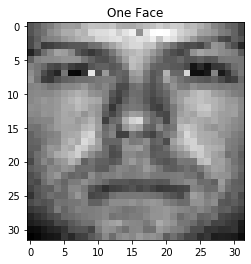

In [10]:
faceW = 32 # number of pixels in image width
faceH = 32 # number of pixels in image height
dimensions = (faceH,faceW)

# reshape the first observation for plotting
obs0 = np.asarray(fea.iloc[0,:])
print('Raw pixel data:\n', obs0)
one_face = np.reshape(obs0, dimensions)
print('Reshaped pixel data:\n', one_face)
one_face = one_face.T # rotate
print('Translated, reshaped pixel data:\n', one_face)

# now that pixels are in the right format, plot it as image
plt.imshow(one_face,cmap='gray')
plt.title('One Face')
plt.show()

In [34]:
# define this as a function
def get_pixels(index, features=fea):
    return np.reshape(
        np.asarray(features.iloc[index,:]),
        dimensions,
    ).T

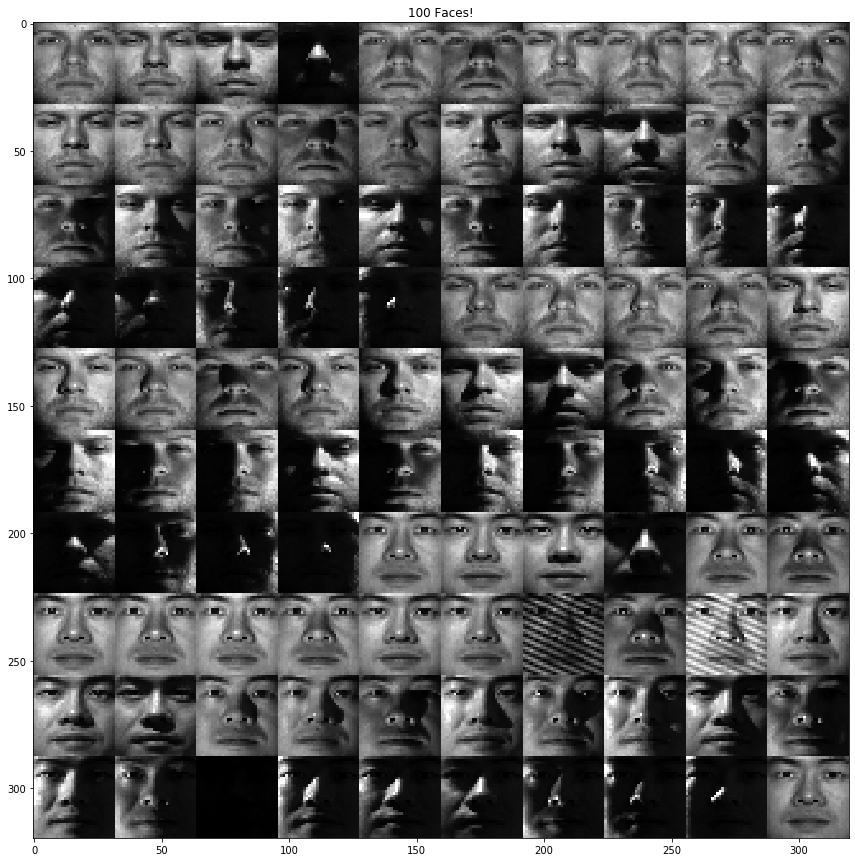

In [19]:
# plot 100 faces!
hundred_faces = np.empty((faceH*showLine,faceW*numPerLine))

kk = 0 
for ii in range(10):
    for jj in range(10):
        hundred_faces[ii*faceH : (ii+1)*faceH, jj*faceW : (jj+1)*faceW] \
            = get_pixels(kk)
        kk += 1

plt.figure(figsize=(15,15))
plt.imshow(hundred_faces,cmap='gray')
plt.title('100 Faces!')
plt.show()

## Eigenfaces

Find the 'eigenfaces'.

> Hint: consider m=number of pixels, n=number of images, so the 'eigenvectors' are the 'eigenfaces', and PCs are projections of each image (face) onto each 'eigenface'.

We can start by performing principal component analysis (PCA) on the image data.

In [21]:
n_modes = np.shape(fea)[1]
pca = PCA(n_components = n_modes) # sklearn.decomposition.PCA
fea_demean = fea.sub(fea.mean(axis=1), axis=0)
PCs = pca.fit_transform(fea)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

Alternatively, we could do PCA from scratch - from the Tutorial 3, the gist of it is to choose some number $k$ of basis functions $v_j$ such that $k << m$ and chosen to maximize variance of $a_{i,j}$, e.g:

$$ var(a_1) = v_1^T C v_q \text{,   where } v_1^T v_1 = 1 $$

Such that we have an approximation:
$$ \text{Observation #1} \approx \sum_{j=1}^3 a_{1,j} \times \overline{v_j} $$

```py
x = fea.T
x -= x.mean().mean()
s = np.cov(x)
eigvals2, eigvecs2 = np.linalg.eig(s)
fracVar2 = eigvals2/np.sum(eigvals2)
PCs2 = eigvecs2.T @ x
```

We then want to verify that PCA worked as expected by checking the number of observations and the number of features.

In [28]:
obs = np.shape(fea)[0]
vars = np.shape(fea)[1]

print('Expected sizes:')
print('\t' + str(vars) + ' eigenvectors, each of length ' + str(vars))
print('\t' + str(vars) + ' eigenvalues, one for each eigenvector')
print('\t' + str(vars) + ' PCs, each of length ' + str(obs))

print('Actual sizes:')
print('\t' + str(np.shape(eigvecs)[0]) + ' eigenvectors, each of length ' + str(np.shape(eigvecs)[1]))
print('\t' + str(len(fracVar)) + ' eigenvalues')
print('\t' + str(np.shape(PCs)[1]) + ' PCs, each of length ' + str(np.shape(PCs)[0]))

Expected sizes:
	1024 eigenvectors, each of length 1024
	1024 eigenvalues, one for each eigenvector
	1024 PCs, each of length 2414
Actual sizes:
	1024 eigenvectors, each of length 1024
	1024 eigenvalues
	1024 PCs, each of length 2414


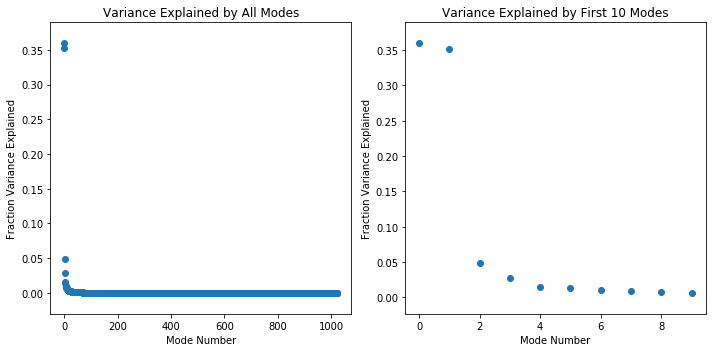

In [29]:
# plot fraction of variance explained by each mode
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()
plt.show()

Plot the first few modes and principal components to check them out:

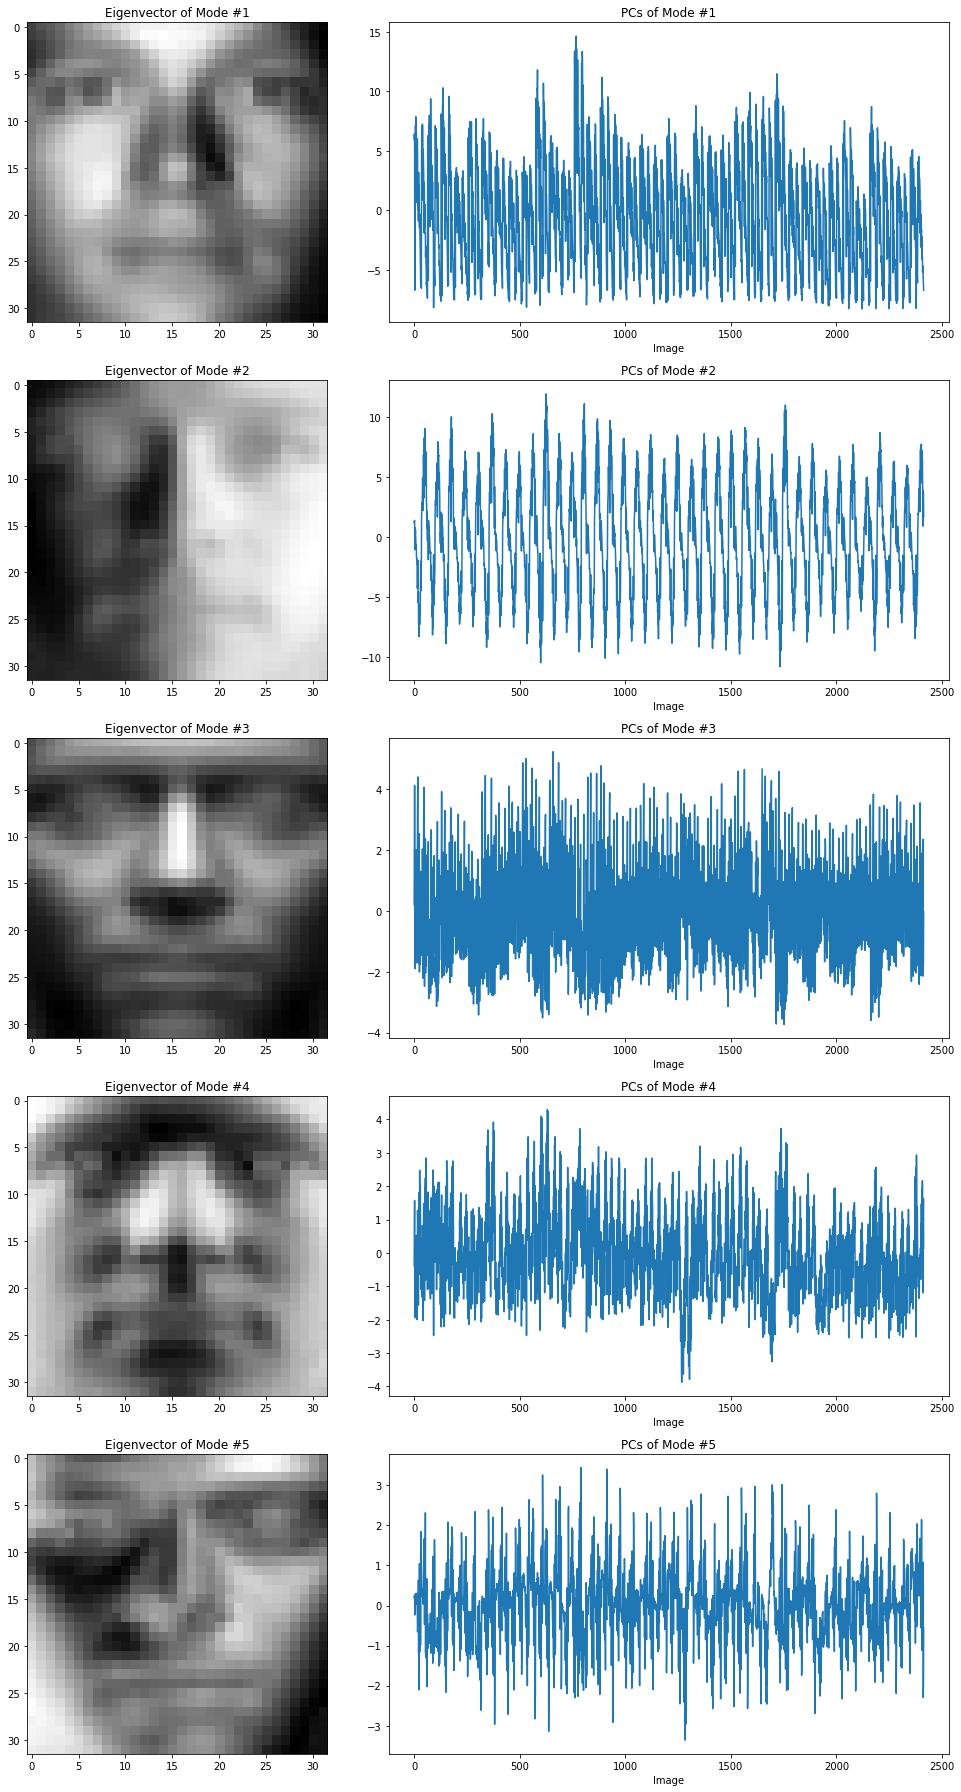

In [31]:
n = 5
plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.imshow(np.reshape(eigvecs[kk,:],(faceW,faceH)).T,cmap='gray')
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Image')
    
    plt.tight_layout()

Looks good! Now reconstruct the faces on the first few modes (ie n=7):

In [32]:
numModes = 7
numImages = 2414

fea_rec = np.empty_like(fea)
fea_mean = fea.mean(axis=1)

for kk in range(numImages):
    this_face_rec = np.zeros_like(fea.iloc[0,:])
    for mode in range(numModes):
        this_face_rec += eigvecs[mode,:]*PCs[kk,mode]
        
    fea_rec[kk,:] = this_face_rec
    
fea_rec += fea.mean().mean()

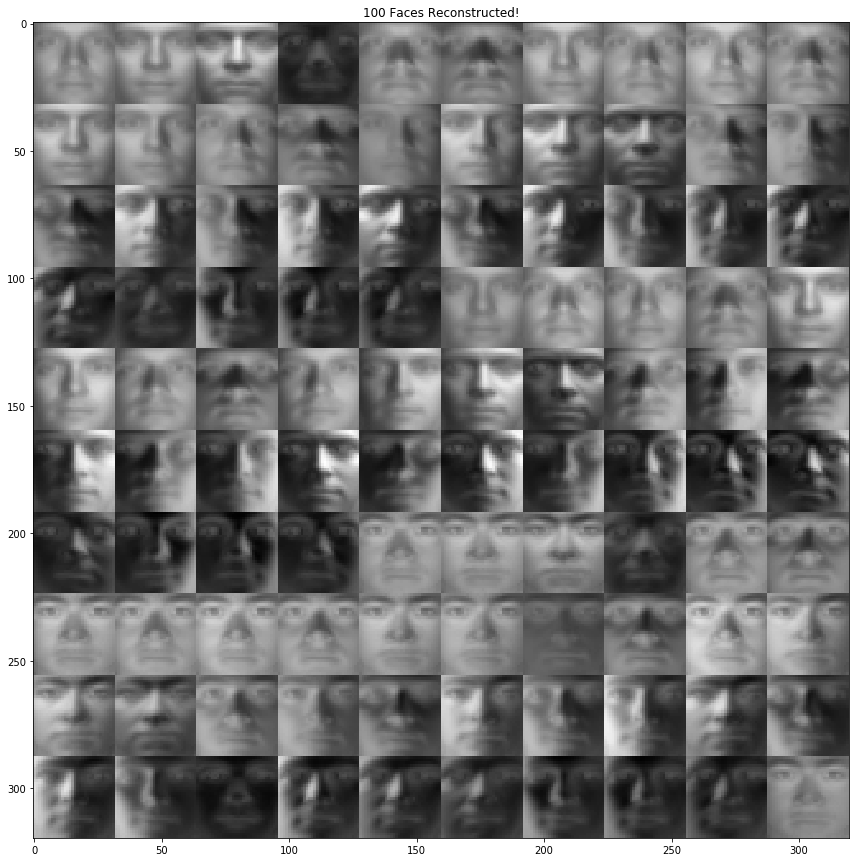

In [36]:
numPerLine = 10
showLine = 10

hundred_faces_rec = np.empty((faceH*showLine,faceW*numPerLine))

kk = 0 
for ii in range(showLine):
    for jj in range(numPerLine):
        hundred_faces_rec[ii*faceH:(ii+1)*faceH, jj*faceW:(jj+1)*faceW] = np.reshape(np.asarray(fea_rec[kk,:]),(faceW,faceH)).T
        kk+=1

plt.figure(figsize=(15,15))
plt.imshow(hundred_faces_rec,cmap='gray')
plt.title('100 Faces Reconstructed!')
plt.show()
